## Pruebas del modulo de acceso a los datos de contador

In [1]:
import pandas as pd
from kwhmeter import suministro,contador, timezone, append_prices, read_config
from datetime import datetime, timedelta
import seaborn as sns


In [2]:
credenciales=read_config()
connection = contador(**credenciales['paconavas'])
#connection = contador(iberdrola,user,password)  #equivalente
#connection = suministro('alarcon')  #equivalente

INFO:root:Existen 25 facturas. Desde: 2021-01-20 00:00:00+01:00 hasta:2023-01-23 00:00:00+01:00


In [3]:

to_day = timezone.localize(datetime(2023,1,19)-timedelta(days=0))
from_day=to_day-timedelta(days=3)

print(f'Recuperando datos desde: {from_day} hasta:{to_day}')


Recuperando datos desde: 2023-01-16 00:00:00+01:00 hasta:2023-01-19 00:00:00+01:00


In [4]:
facturas=connection.facturas()
facturas

,fechaInicio,fechaFin,numero
factura,,,
2023-01-23,2023-01-09 00:00:00+01:00,2023-01-23 00:00:00+01:00,3230123030362980
2023-01-09,2022-12-22 00:00:00+01:00,2023-01-09 00:00:00+01:00,3230109030312833
2022-12-22,2022-11-22 00:00:00+01:00,2022-12-22 00:00:00+01:00,3221222030362782
2022-11-22,2022-10-21 00:00:00+02:00,2022-11-22 00:00:00+01:00,3221122030323849
2022-10-21,2022-09-27 00:00:00+02:00,2022-10-21 00:00:00+02:00,3221021030346154
2022-09-27,2022-07-26 00:00:00+02:00,2022-09-27 00:00:00+02:00,3220927030337878
2022-07-26,2022-06-23 00:00:00+02:00,2022-07-26 00:00:00+02:00,3220726030358467
2022-06-28,2022-05-23 00:00:00+02:00,2022-06-23 00:00:00+02:00,3220628030327990
2022-05-23,2022-04-22 00:00:00+02:00,2022-05-23 00:00:00+02:00,3220523030347163


In [6]:
##cc=connection.consumo(from_day,to_day)
cc=connection.consumo_facturado(['2023-01-23'])
cc=append_prices(cc)


INFO:root:recovering missing dates:0


In [7]:
cc

,factura,consumo,tipo,periodo,factura_iberdrola,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
fecha,,,,,,,,,,,
2023-01-09 01:00:00+01:00,2023-01-23,87.0,R,P3,3230123030362980,41.07,-2.90,3.18,0.003573,-0.000252,0.000277
2023-01-09 02:00:00+01:00,2023-01-23,76.0,R,P3,3230123030362980,43.12,-2.37,3.18,0.003277,-0.000180,0.000242
2023-01-09 03:00:00+01:00,2023-01-23,51.0,R,P3,3230123030362980,44.46,-2.36,3.18,0.002267,-0.000120,0.000162
2023-01-09 04:00:00+01:00,2023-01-23,88.0,R,P3,3230123030362980,47.64,-0.27,3.18,0.004192,-0.000024,0.000280
2023-01-09 05:00:00+01:00,2023-01-23,83.0,R,P3,3230123030362980,49.81,0.50,3.18,0.004134,0.000041,0.000264
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-22 20:00:00+01:00,2023-01-23,261.0,R,P3,3230123030362980,127.23,-1.42,3.18,0.033207,-0.000371,0.000830
2023-01-22 21:00:00+01:00,2023-01-23,787.0,R,P3,3230123030362980,175.44,-0.68,3.18,0.138071,-0.000535,0.002503
2023-01-22 22:00:00+01:00,2023-01-23,611.0,R,P3,3230123030362980,169.94,-0.66,3.18,0.103833,-0.000403,0.001943


<AxesSubplot:xlabel='fecha'>

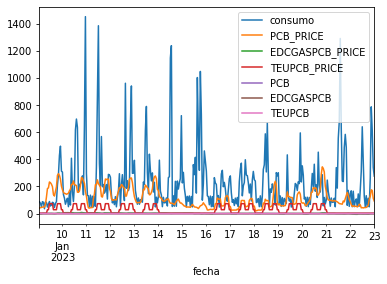

In [8]:
cc.plot()

In [9]:
cc.to_csv('consumos.csv',decimal=',')


In [10]:
totales=cc.groupby(['factura'])[['consumo','PCB','EDCGASPCB','TEUPCB']].sum()
totales

,consumo,PCB,EDCGASPCB,TEUPCB
factura,,,,
2023-01-23,77276.0,9.682714,0.113194,2.304853


In [11]:
cc['2022-08-25':'2022-09-30']['consumo'].sum()+cc['2022-10-01':'2022-10-24']['consumo'].sum()

0.0

In [12]:
cc.groupby(['factura','tipo']).sum()

<ipython-input-12-4a6b15d68e66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','tipo']).sum()


,,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
factura,tipo,,,,,,,
2023-01-23,R,77276.0,38896.99,443.83,8684.48,9.682714,0.113194,2.304853


In [13]:
cc.groupby(['factura','periodo']).sum()

<ipython-input-13-3d54d8d27882>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','periodo']).sum()


consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo                                                      
2023-01-23 P1       21931.0   15419.27           189.23       5839.20   
           P2       20800.0   10199.03           152.19       2285.60   
           P3       34545.0   13278.69           102.41        559.68   

                         PCB  EDCGASPCB    TEUPCB  
factura    periodo                                 
2023-01-23 P1       4.382685   0.062765  1.600744  
           P2       2.614799   0.043862  0.594256  
           P3       2.685230   0.006568  0.109853

In [14]:
cc.groupby(['factura','periodo','tipo']).sum()

<ipython-input-14-637501761a56>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','periodo','tipo']).sum()


consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo tipo                                                      
2023-01-23 P1      R     21931.0   15419.27           189.23       5839.20   
           P2      R     20800.0   10199.03           152.19       2285.60   
           P3      R     34545.0   13278.69           102.41        559.68   

                              PCB  EDCGASPCB    TEUPCB  
factura    periodo tipo                                 
2023-01-23 P1      R     4.382685   0.062765  1.600744  
           P2      R     2.614799   0.043862  0.594256  
           P3      R     2.685230   0.006568  0.109853

<ipython-input-15-f9d6a7d50a59>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')


<AxesSubplot:xlabel='factura', ylabel='consumo'>

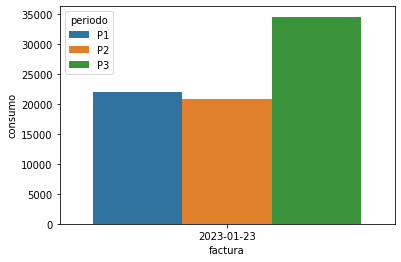

In [15]:
sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')

<AxesSubplot:>

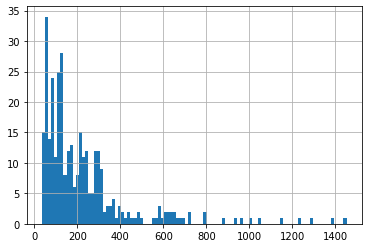

In [16]:
cc.consumo.hist(bins=100)

In [17]:
cc.consumo.min()

36.0

In [18]:
cc[cc.consumo<200].consumo.sum()

20398.0